# CNN from Scratch on CIFAR-10

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 50s 69ms/step - accuracy: 0.3246 - loss: 1.8281 - val_accuracy: 0.5192 - val_loss: 1.3370
Epoch 2/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 46s 66ms/step - accuracy: 0.5327 - loss: 1.2997 - val_accuracy: 0.5818 - val_loss: 1.1680
Epoch 3/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 48s 68ms/step - accuracy: 0.6040 - loss: 1.1158 - val_accuracy: 0.6234 - val_loss: 1.1050
Epoch 4/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 49s 70ms/step - accuracy: 0.6443 - loss: 1.0103 - val_accuracy: 0.6674 - val_loss: 0.9655
Epoch 5/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 50s 71ms/step - accuracy: 0.6758 - loss: 0.9233 - val_accuracy: 0.6758 - val_loss: 0.9340
Epoch 6/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 71s 55ms/step - accuracy: 0.7014 - loss: 0.8474 - val_accuracy: 0.7078 - val_loss: 0.8338
Epoch 7/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 35s 49ms/step - accuracy: 0.7266 - loss: 0.7850 - val_accuracy: 0.7070 - val_loss: 0.8588
Epoch 8/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 37s 52ms/step - accuracy: 0.7349 - loss: 0.7538 - 

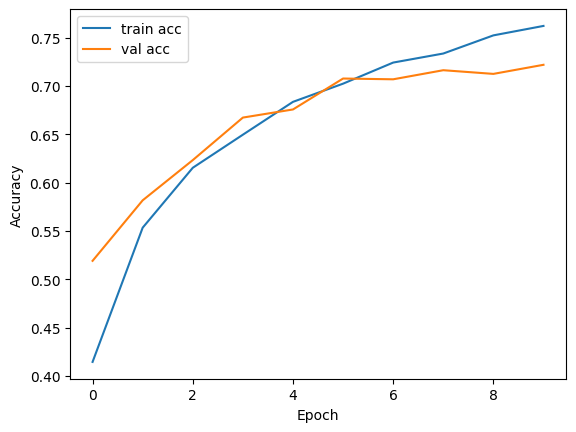

Test accuracy: 0.7076
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step
              precision    recall  f1-score   support

    airplane       0.73      0.75      0.74      1000
  automobile       0.81      0.86      0.83      1000
        bird       0.55      0.66      0.60      1000
         cat       0.55      0.52      0.53      1000
        deer       0.68      0.59      0.63      1000
         dog       0.70      0.54      0.61      1000
        frog       0.75      0.81      0.78      1000
       horse       0.65      0.83      0.73      1000
        ship       0.87      0.78      0.82      1000
       truck       0.85      0.73      0.78      1000

    accuracy                           0.71     10000
   macro avg       0.71      0.71      0.71     10000
weighted avg       0.71      0.71      0.71     10000



FileNotFoundError: [Errno 2] No such file or directory: '../models/cnn_cifar10.keras'

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import layers, models, datasets
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

# 1. Load and normalize data

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']


# 2. Model architecture

In [ ]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)
])

model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)
model.summary()

# 3. Train model

In [ ]:

history = model.fit(train_images, train_labels, epochs=10,
                    validation_split=0.1, batch_size=64, verbose=1)

# 4. Plot accuracy/loss

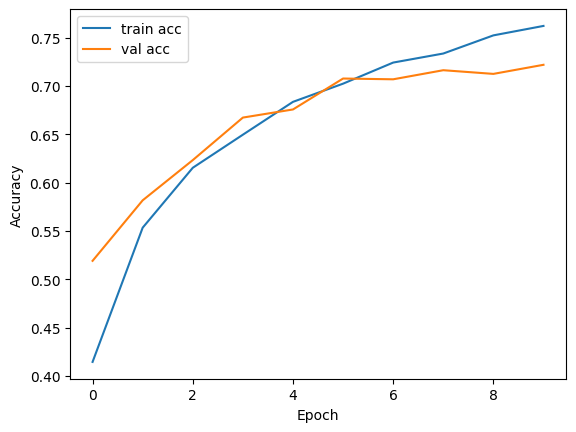

In [5]:

plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend(); plt.xlabel('Epoch'); plt.ylabel('Accuracy'); plt.show()

# 5. Evaluate

In [3]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=0)
print(f'Test accuracy: {test_acc:.4f}')

Test accuracy: 0.7076


# 6. Detailed metrics

In [4]:
y_pred = np.argmax(model.predict(test_images), axis=1)
print(classification_report(test_labels, y_pred, target_names=class_names))

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step
              precision    recall  f1-score   support

    airplane       0.73      0.75      0.74      1000
  automobile       0.81      0.86      0.83      1000
        bird       0.55      0.66      0.60      1000
         cat       0.55      0.52      0.53      1000
        deer       0.68      0.59      0.63      1000
         dog       0.70      0.54      0.61      1000
        frog       0.75      0.81      0.78      1000
       horse       0.65      0.83      0.73      1000
        ship       0.87      0.78      0.82      1000
       truck       0.85      0.73      0.78      1000

    accuracy                           0.71     10000
   macro avg       0.71      0.71      0.71     10000
weighted avg       0.71      0.71      0.71     10000



# 7. Save model

In [2]:
model.save('cnn_cifar10.keras')